In [1]:
import os
import sys
import sys
# import warnings
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import librosa
import librosa.display
from sklearn.metrics import confusion_matrix
from IPython.display import Audio
# import IPython.display as ip

# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
# warnings.filterwarnings("ignore", category=DeprecationWarning) 

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
#dataset path
dataset = "TESS_dataset"

#cek class dari dataset
class_list  = os.listdir(dataset)
class_list[:]

['YAF_disgust',
 'OAF_Pleasant_surprise',
 'OAF_happy',
 'YAF_sad',
 'YAF_happy',
 'YAF_neutral',
 'OAF_Fear',
 'OAF_angry',
 'YAF_pleasant_surprised',
 'YAF_fear',
 'OAF_neutral',
 'OAF_disgust',
 'YAF_angry',
 'OAF_Sad']

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk(dataset):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
paths[:5]

['TESS_dataset/YAF_disgust/YAF_date_disgust.wav',
 'TESS_dataset/YAF_disgust/YAF_rag_disgust.wav',
 'TESS_dataset/YAF_disgust/YAF_raise_disgust.wav',
 'TESS_dataset/YAF_disgust/YAF_ditch_disgust.wav',
 'TESS_dataset/YAF_disgust/YAF_door_disgust.wav']

In [5]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,TESS_dataset/YAF_disgust/YAF_date_disgust.wav,disgust
1,TESS_dataset/YAF_disgust/YAF_rag_disgust.wav,disgust
2,TESS_dataset/YAF_disgust/YAF_raise_disgust.wav,disgust
3,TESS_dataset/YAF_disgust/YAF_ditch_disgust.wav,disgust
4,TESS_dataset/YAF_disgust/YAF_door_disgust.wav,disgust


/Users/itdeveloper/opt/miniconda3/envs/training/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

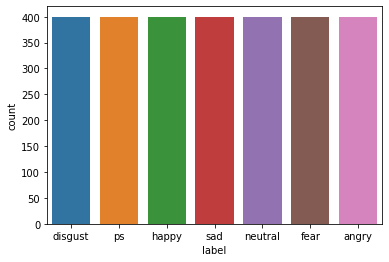

In [6]:
import seaborn as sns
sns.countplot(df['label'])

In [7]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show

In [8]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [9]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[5]
data, sampling_rate = librosa.load(path)

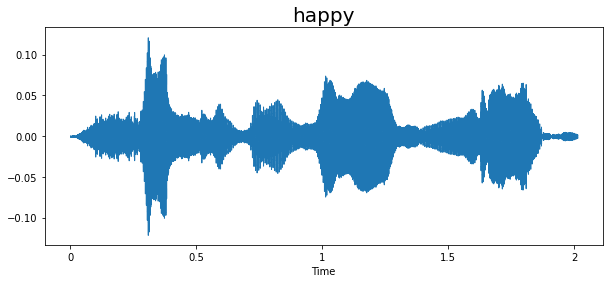

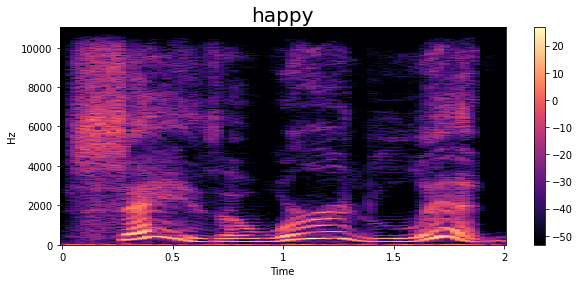

In [10]:
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

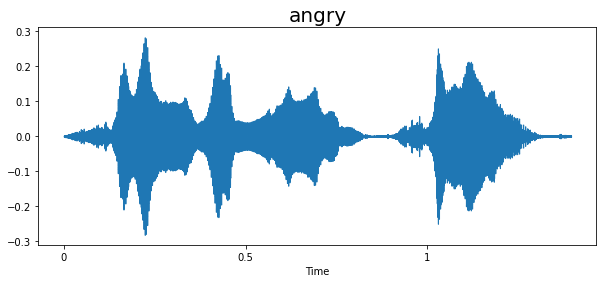

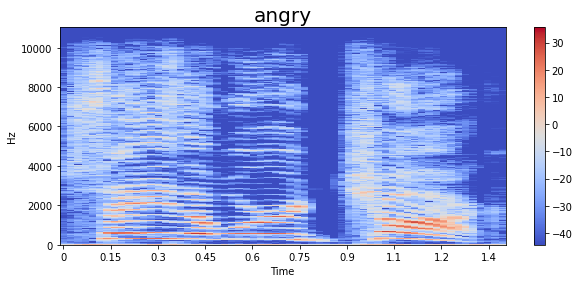

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

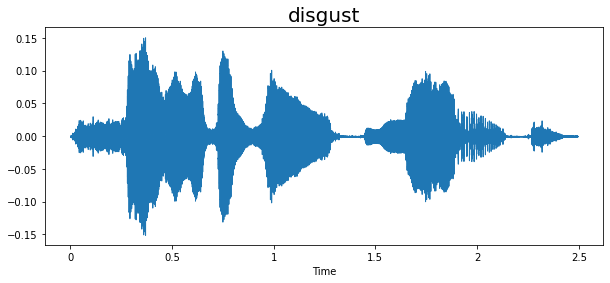

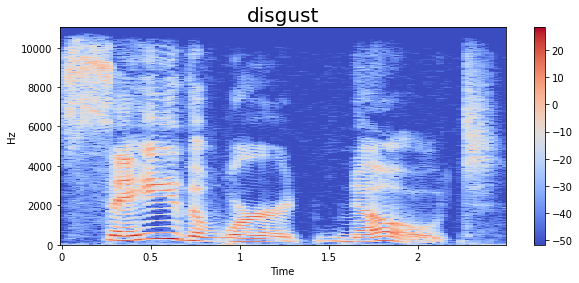

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

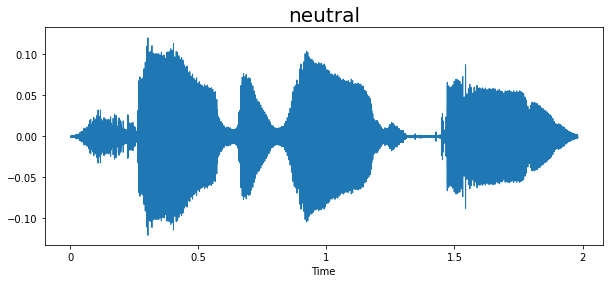

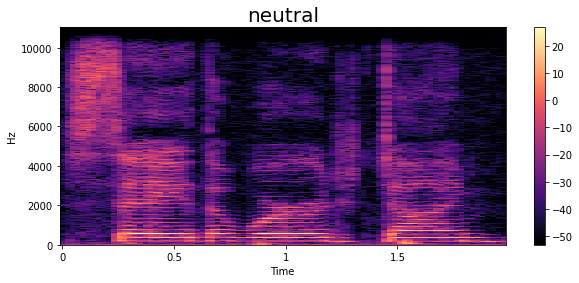

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

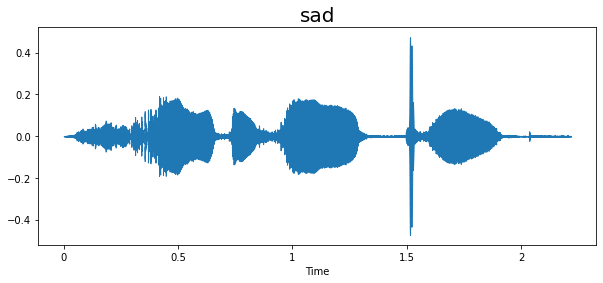

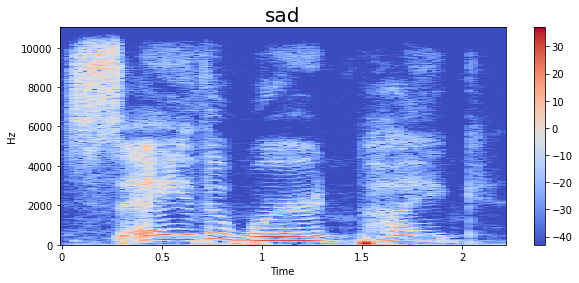

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

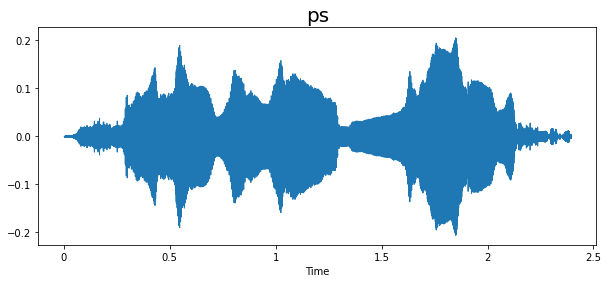

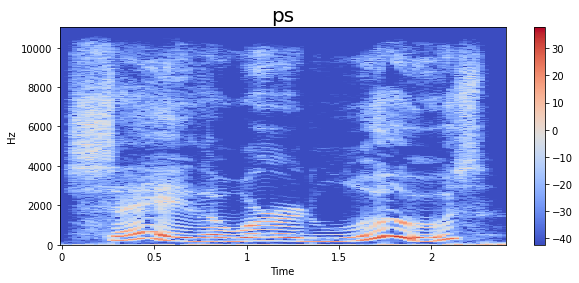

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

In [16]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [17]:
extract_mfcc(df['speech'][0])

array([-448.12143  ,   76.269295 ,   -0.9191557,   43.083214 ,
        -10.891947 ,   -0.5203845,   -9.062494 ,  -14.855755 ,
         -7.914826 ,  -11.158762 ,   -9.584479 ,    8.971188 ,
        -12.530619 ,    5.204661 ,   -2.927844 ,   -3.7665367,
          2.4818828,    0.5662345,  -10.708518 ,    3.687641 ,
         -9.160456 ,    1.9704063,   -4.924    ,    1.51113  ,
         -3.0475235,   -0.8671448,   -3.643645 ,    3.6106021,
         -3.714181 ,    5.0957165,   -1.3896621,    4.6357956,
          1.4008645,    4.0842476,    4.134367 ,    3.2155995,
          3.481357 ,    4.100075 ,    2.356798 ,    2.1458683],
      dtype=float32)

In [18]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-448.12143, 76.269295, -0.9191557, 43.083214,...
1       [-385.0071, 110.46193, -19.877562, 18.173979, ...
2       [-405.75934, 89.64646, -1.9422824, 24.63877, -...
3       [-446.4092, 69.80169, -6.08053, 33.56848, -13....
4       [-431.41138, 120.152985, 5.5714774, 6.5918164,...
                              ...                        
2795    [-576.25287, 97.74454, 32.785885, 18.876131, 1...
2796    [-559.6478, 92.3095, 31.23662, 17.749418, 20.4...
2797    [-529.0292, 118.03585, 23.415989, 10.373423, 1...
2798    [-561.70056, 122.59018, 38.99575, -0.6553258, ...
2799    [-554.4841, 109.282326, 32.611538, 10.608653, ...
Name: speech, Length: 2800, dtype: object

In [19]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [20]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [21]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [22]:
y = y.toarray()
y.shape

(2800, 7)

In [23]:
y.shape

(2800, 7)

# Split data 70:30

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1960, 40, 1)
(1960, 7)
(840, 40, 1)
(840, 7)


# CNN Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D, Flatten, Dense
model=Sequential()
model.add(Conv2D(32,(4,10),input_shape=(30,216,1),activation='relu',padding='same'))
model.add(MaxPool2D(3,3))
model.add(Dropout(0.2))

model.add(Conv2D(32,(4,10),activation='relu',padding='same'))
model.add(MaxPool2D(3,3))
model.add(Dropout(0.2))

model.add(Conv2D(32,(4,10),activation='relu',padding='same'))
model.add(MaxPool2D(3,3))
model.add(Dropout(0.2))

model.add(Flatten())

#dense layer untuk 7 class
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 216, 32)       1312      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 72, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 72, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 72, 32)        40992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 24, 32)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 3, 24, 32)         0

2022-07-21 10:30:07.645738: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
from tensorflow.keras.optimizers import Adam
#learning rate default = 0.001
model.compile(optimizer=Adam(learning_rate=0.0001) ,loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=32, verbose = 2, epochs=50)

Epoch 1/50


ValueError: in user code:

    File "/Users/itdeveloper/opt/miniconda3/envs/training/lib/python3.7/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/itdeveloper/opt/miniconda3/envs/training/lib/python3.7/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/itdeveloper/opt/miniconda3/envs/training/lib/python3.7/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/itdeveloper/opt/miniconda3/envs/training/lib/python3.7/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/Users/itdeveloper/opt/miniconda3/envs/training/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/itdeveloper/opt/miniconda3/envs/training/lib/python3.7/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 30, 216, 1), found shape=(None, 40, 1)
